This notebook is meant to explore the relationship between our transportation data and the CO2 emissions

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
transportation_df = pd.read_csv(".\data\Monthly_Transportation_Statistics.csv")

Extract the month and year from the datetime column and make new columns to hold those values 

In [4]:
transportation_df['Month'] = [int(datetime[0:2]) for datetime in transportation_df['Date']]
transportation_df['Year'] = [int(datetime[6:10]) for datetime in transportation_df['Date']]

In [5]:
transportation_df.tail()

Index                    Date  Air Safety - General Aviation Fatalities  \
880    880  05/01/2020 12:00:00 AM                                      22.0   
881    881  06/01/2020 12:00:00 AM                                      29.0   
882    882  07/01/2020 12:00:00 AM                                      55.0   
883    883  08/01/2020 12:00:00 AM                                      27.0   
884    884  09/01/2020 12:00:00 AM                                       NaN   

     Highway Fatalities Per 100 Million Vehicle Miles Traveled  \
880                                                NaN           
881                                                NaN           
882                                                NaN           
883                                                NaN           
884                                                NaN           

    Highway Fatalities U.S. Airline Traffic - Total - Seasonally Adjusted  \
880                NaN                                          8,430,000   
881                NaN                               16,489,999.999999998   
882                NaN                                                NaN   
883                NaN                                                NaN   
884                NaN                                                NaN   

    U.S. Airline Traffic - International - Seasonally Adjusted  \
880                                            190,000           
881                                            400,000           
882                                                NaN           
883                                                NaN           
884                                                NaN           

    U.S. Airline Traffic - Domestic - Seasonally Adjusted  \
880                                          8,240,000      
881                                         16,090,000      
882                                                NaN      
883                                                NaN      
884                                                NaN      

    Transit Ridership - Other Transit Modes - Adjusted  \
880                                          5,630,575   
881                                          7,069,441   
882                                          6,906,061   
883                                                NaN   
884                                                NaN   

    Transit Ridership - Fixed Route Bus - Adjusted  ...  \
880                                    128,612,616  ...   
881                                    159,137,385  ...   
882                                    176,412,126  ...   
883                                            NaN  ...   
884                                            NaN  ...   

    Light truck sales SAAR (millions)  \
880                         9,488,000   
881                        10,102,000   
882                        11,023,000   
883                               NaN   
884                               NaN   

    U.S. Airline Traffic - International - Non Seasonally Adjusted  \
880                                            190,000               
881                                            400,000               
882                                                NaN               
883                                                NaN               
884                                                NaN               

    Auto sales SAAR (millions)  \
880                  2,709,000   
881                  2,967,000   
882                  3,498,000   
883                        NaN   
884                        NaN   

    U.S. Airline Traffic - Domestic - Non Seasonally Adjusted  \
880                                          8,240,000          
881                                         16,090,000          
882                                                NaN          
883                                                NaN         

In [11]:
#make a df with only the air transportation data 
air_transport_df = transportation_df[["Month", "Year", "U.S. Airline Traffic - Total - Non Seasonally Adjusted", "U.S. Airline Traffic - International - Non Seasonally Adjusted",  "U.S. Airline Traffic - Domestic - Non Seasonally Adjusted"]]

In [14]:
#Consider any NA values - for now, I am just going to fill the ones that are NAN with 0 in the columns I am looking at

air_transport_df = air_transport_df.rename(columns = {'U.S. Airline Traffic - International - Non Seasonally Adjusted' : 'airline_international',
                                                      'U.S. Airline Traffic - Domestic - Non Seasonally Adjusted' : 'airline_domestic',
                                                        'U.S. Airline Traffic - Total - Non Seasonally Adjusted' : 'airline_total'})

air_transport_df['airline_domestic'] = air_transport_df['airline_domestic'].fillna(0)
air_transport_df['airline_international'] = air_transport_df['airline_international'].fillna(0)
air_transport_df['airline_total'] = air_transport_df['airline_total'].fillna(0)


#Let's just look at data since 2017
air_transport_recent = air_transport_df[air_transport_df["Year"] >= 2017]

Let's set the index to be the month and year combined

In [15]:
air_transport_recent.loc[:, "Month-Year"] = air_transport_recent.loc[:, "Month"].astype(str) + '-' + air_transport_recent.loc[:, "Year"].astype(str) 
air_transport_recent.set_index("Month-Year", inplace = True)

C:\Users\baile\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\baile\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [18]:
#take out any commas in the data
air_transport_recent.loc[:, 'airline_international'] = air_transport_recent.loc[:, 'airline_international'].astype(str)
air_transport_recent.loc[:, 'airline_international'] = [s.replace(',','') for s in air_transport_recent.loc[:, 'airline_international']]
air_transport_recent.loc[:, 'airline_international'] = air_transport_recent.loc[:, 'airline_international'].astype(float)

air_transport_recent.loc[:, 'airline_domestic'] = air_transport_recent.loc[:,'airline_domestic'].astype(str)
air_transport_recent.loc[:, 'airline_domestic'] = [s.replace(',','') for s in air_transport_recent.loc[:, 'airline_domestic']]
air_transport_recent.loc[:, 'airline_domestic'] = air_transport_recent.loc[:,'airline_domestic'].astype(float)

air_transport_recent.loc[:, 'airline_total'] = air_transport_recent.loc[:,'airline_total'].astype(str)
air_transport_recent.loc[:, 'airline_total'] = [s.replace(',','') for s in air_transport_recent.loc[:, 'airline_total']]
air_transport_recent.loc[:, 'airline_total'] = air_transport_recent.loc[:,'airline_total'].astype(float)



C:\Users\baile\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [22]:
air_transport_recent

Month  Year  airline_total  airline_international  \
Month-Year                                                      
1-2017          1  2017     62620000.0              8510000.0   
2-2017          2  2017     58380000.0              7300000.0   
3-2017          3  2017     72960000.0              9000000.0   
4-2017          4  2017     70260000.0              9160000.0   
5-2017          5  2017     73680000.0              9240000.0   
6-2017          6  2017     77010000.0             10260000.0   
7-2017          7  2017     79820000.0             11240000.0   
8-2017          8  2017     77100000.0             10440000.0   
9-2017          9  2017     64920000.0              7770000.0   
10-2017        10  2017     72700000.0              8080000.0   
11-2017        11  2017     69630000.0              7720000.0   
12-2017        12  2017     70330000.0              8960000.0   
1-2018          1  2018     64430000.0              8600000.0   
2-2018          2  2018     61720000.0              7640000.0   
3-2018          3  2018     76290000.0              9650000.0   
4-2018          4  2018     73630000.0              9070000.0   
5-2018          5  2018     77300000.0              9450000.0   
6-2018          6  2018     80880000.0             10610000.0   
7-2018          7  2018     83960000.0             11420000.0   
8-2018          8  2018     80990000.0             10650000.0   
9-2018          9  2018     68700000.0              8230000.0   
10-2018        10  2018     75510000.0              8420000.0   
11-2018        11  2018     72740000.0              8080000.0   
12-2018        12  2018     72880000.0              9240000.0   
1-2019          1  2019     67020000.0              8980000.0   
2-2019          2  2019     63580000.0              7900000.0   
3-2019          3  2019     80210000.0              9980000.0   
4-2019          4  2019     76430000.0              9490000.0   
5-2019          5  2019     81350000.0              9980000.0   
6-2019          6  2019     83840000.0             11050000.0   
7-2019          7  2019     86960000.0             11670000.0   
8-2019          8  2019     83780000.0             11070000.0   
9-2019          9  2019     72590000.0              8610000.0   
10-2019        10  2019     78620000.0              8690000.0   
11-2019        11  2019     73070000.0              8260000.0   
12-2019        12  2019     79300000.0              9580000.0   
1-2020          1  2020     70760000.0              9150000.0   
2-2020          2  2020     67810000.0              7960000.0   
3-2020          3  2020     39060000.0              4650000.0   
4-2020          4  2020      3010000.0               130000.0   
5-2020          5  2020      8430000.0               190000.0   
6-2020          6  2020     16490000.0               400000.0   
7-2020          7  2020            0.0                    0.0   
8-2020          8  2020            0.0                    0.0   
9-2020          9  2020            0.0                    0.0   

            airline_domestic  
Month-Year                    
1-2017            54110000.0  
2-2017            51080000.0  
3-2017            63960000.0  
4-2017            61100000.0  
5-2017            64440000.0  
6-2017            66750000.0  
7-2017            68580000.0  
8-2017            66670000.0  
9-2017            57150000.0  
10-2017           64630000.0  
11-2017           61910000.0  
12-2017           61370000.0  
1-2018            55830000.0  
2-2018            54080000.0  
3-2018            66640000.0  
4-2018            64560000.0  
5-2018            67840000.0  
6-2018            70280000.0  
7-2018            72540000.0  
8-2018            70340000.0  
9-2018            60470000.0  
10-2018           67080000.0  
11-2018           64660000.0  
12-2018           63650000.0  
1-2019            58030000.0  
2-2019            55680000.0  
3-2019            70230000.0  
4-2019            66940000.0  
5-2019            71370000

Let's look at the total non seasonally adjusted data by month 


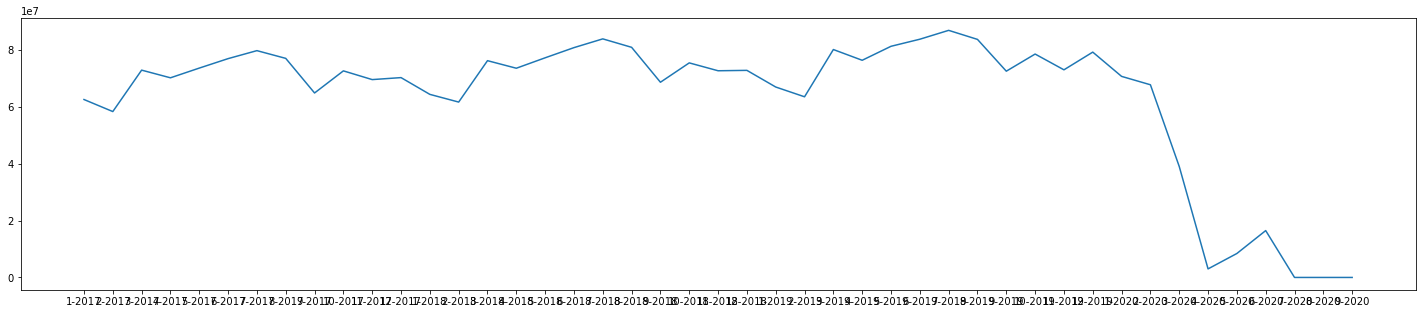

In [21]:
plt.figure(figsize=(25, 5))
plt.plot(air_transport_recent["airline_total"])

plt.show()

Next I want to add the CO2 data to confirm that it is correlated 


this whole process would also be good to do with driving data as well

In [26]:
air_transport_recent.to_csv("recent_air_travel.csv")